In [1]:
from google.colab import files

uploaded = files.upload()


Saving Elon_musk.csv to Elon_musk.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       3
1       3
2       3
3       3
4       3
       ..
1994    4
1995    1
1996    3
1997    3
1998    3
Name: Cluster, Length: 1999, dtype: int32


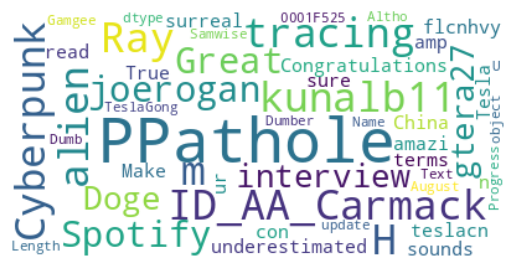

Cluster
0    0.028070
1    0.127852
2    0.147092
3    0.149362
4    0.099733
Name: Sentiment, dtype: float64
['0', '2                     @joerogan @Spotify Great', '3                         @gtera27 Doge', '4', 'China', '1994', '1995', '1996', 'Samwise Gamgee', '1997', 'Altho Dumb and Dumber', '1998', 'August 28', '1999']
['0', '2                     @joerogan @Spotify Great', '3                         @gtera27 Doge', '4', 'China', '1994', '1995', '1996', 'Samwise Gamgee', '1997', 'Altho Dumb and Dumber', '1998', 'August 28', '1999', '0 2                     @joerogan @Spotify Great', '2                     @joerogan @Spotify Great 3                         @gtera27 Doge', '3                         @gtera27 Doge 4', '4 China', 'China 1994', '1994 1995', '1995 1996', '1996 Samwise Gamgee', 'Samwise Gamgee 1997', '1997 Altho Dumb and Dumber', 'Altho Dumb and Dumber 1998', '1998 August 28', 'August 28 1999', '0 2                     @joerogan @Spotify Great 3                         

In [2]:
import pandas as pd

# Try reading the CSV file with different encodings
try:
    files = pd.read_csv('Elon_musk.csv', encoding='utf-8')
except UnicodeDecodeError:
    files = pd.read_csv('Elon_musk.csv', encoding='latin1')

# Display the first few rows of the DataFrame
files.head()

# prompt: Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

import pandas as pd
from textblob import TextBlob

# Create a new column for the sentiment
files['Sentiment'] = files['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows of the DataFrame
files.head()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the text data
X = vectorizer.fit_transform(files['Text'])

# Create a KMeans model with 5 clusters
km = KMeans(n_clusters=5)

# Fit the KMeans model to the TF-IDF vectors
km.fit(X)

# Add the cluster labels to the DataFrame
files['Cluster'] = km.labels_

# Print the cluster labels
print(files['Cluster'])

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)

# Generate a word cloud from the text data
wc.generate(str(files['Text']))

# Display the word cloud
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Calculate the sentiment for each cluster
sentiment_by_cluster = files.groupby('Cluster')['Sentiment'].mean()

# Print the sentiment for each cluster
print(sentiment_by_cluster)

import spacy
nlp = spacy.load("en_core_web_sm")

# Extract named entities from the text
entities = [ent.text for ent in nlp(str(files['Text'])).ents]

# Print the named entities
print(entities)

# Create a list of n-grams
ngrams = []
for i in range(1, 4):
    for j in range(len(entities) - i + 1):
        ngrams.append(' '.join(entities[j:j+i]))

# Print the n-grams
print(ngrams)

# Create a list of bi-grams
bigrams = []
for i in range(len(entities) - 1):
    bigrams.append(' '.join(entities[i:i+2]))

# Print the bi-grams
print(bigrams)

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

try:
    files = pd.read_csv('Elon_musk.csv', encoding='utf-8')
except UnicodeDecodeError:
    files = pd.read_csv('Elon_musk.csv', encoding='latin1')



text_data = files['Text']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')

# Fit the vectorizer to the text data and transform it into TF-IDF features
X_tfidf = vectorizer.fit_transform(text_data)

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print("TF-IDF Feature Names:")
print(feature_names)

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X_tfidf.shape)


TF-IDF Feature Names:
['000' '000 ft' '000 ft amp' ... 'ðogecoin' 'ðogecoin instructional'
 'ðogecoin instructional video']
TF-IDF Matrix Shape: (1999, 26289)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Consider uni-grams, bi-grams, and tri-grams

# Fit the vectorizer to the text data and transform it into a TF-IDF matrix
X = vectorizer.fit_transform(text_data)
print(X)

  (0, 17975)	0.4352642315482782
  (0, 2400)	0.4352642315482782
  (0, 17974)	0.4352642315482782
  (0, 1639)	0.412946335701221
  (0, 2391)	0.2676854847945283
  (0, 17973)	0.4352642315482782
  (1, 37567)	0.1773614401609688
  (1, 13955)	0.16826734544356833
  (1, 18461)	0.1773614401609688
  (1, 21455)	0.1773614401609688
  (1, 16682)	0.1773614401609688
  (1, 13991)	0.1773614401609688
  (1, 36706)	0.1773614401609688
  (1, 8156)	0.1773614401609688
  (1, 22699)	0.1773614401609688
  (1, 33845)	0.1773614401609688
  (1, 25547)	0.1773614401609688
  (1, 15411)	0.1773614401609688
  (1, 33957)	0.1773614401609688
  (1, 37566)	0.16826734544356833
  (1, 13952)	0.1568101410782452
  (1, 18460)	0.1773614401609688
  (1, 21454)	0.16826734544356833
  (1, 16681)	0.1773614401609688
  (1, 13990)	0.1773614401609688
  :	:
  (1997, 24448)	0.23812846527011386
  (1997, 1878)	0.23812846527011386
  (1997, 16400)	0.21053594400148562
  (1997, 124)	0.20040366063080886
  (1997, 16399)	0.21053594400148562
  (1997, 123)	0.379

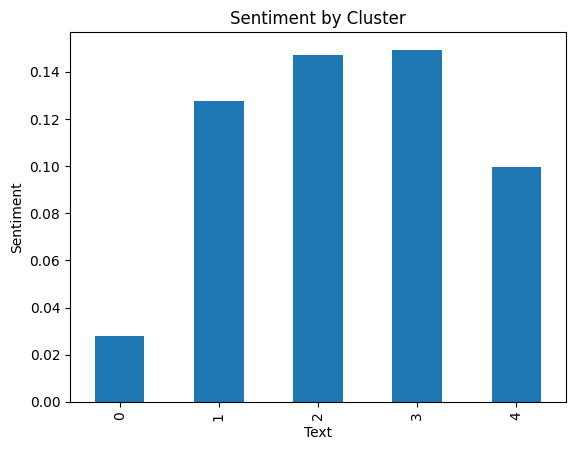

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.pri

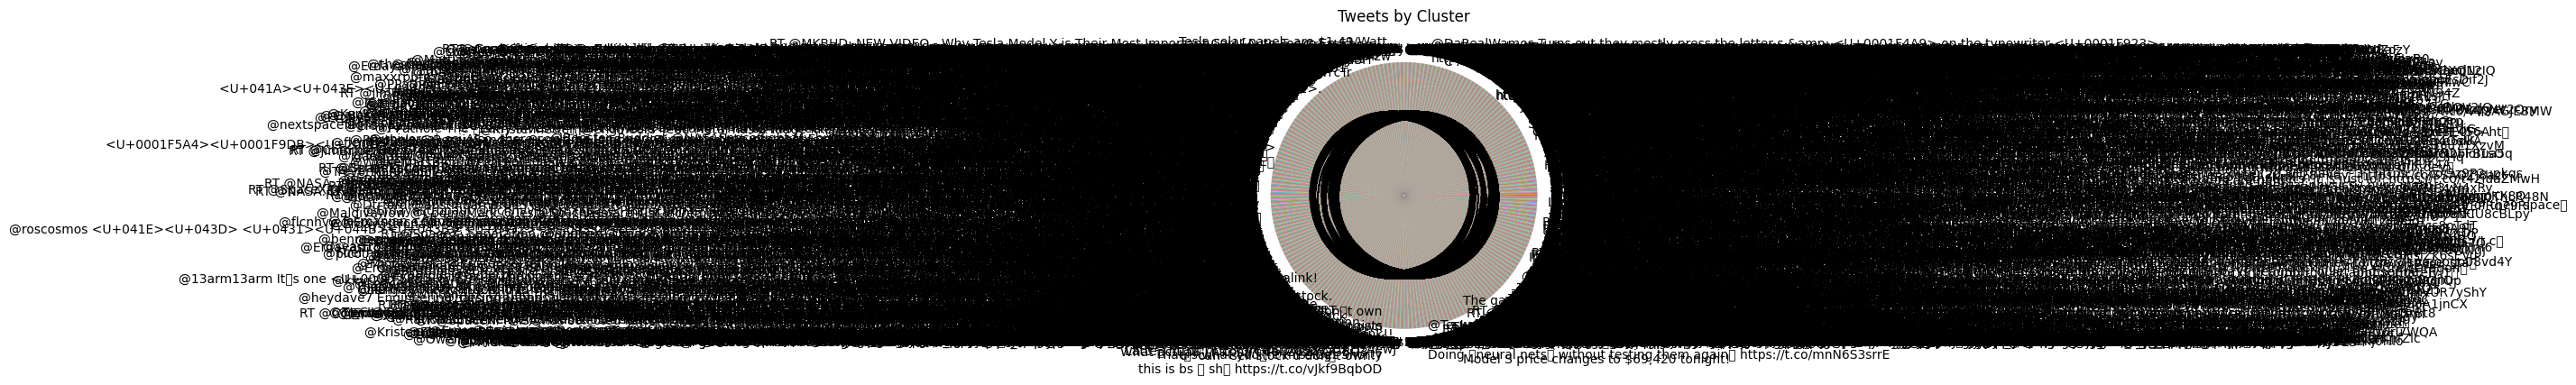

In [18]:
import matplotlib.pyplot as plt
# Create a bar chart of the sentiment for each cluster
sentiment_by_cluster.plot(kind='bar')
plt.title('Sentiment by Cluster')
plt.xlabel('Text')
plt.ylabel('Sentiment')
plt.show()

# Create a pie chart of the number of tweets in each cluster
cluster_counts = files['Text'].value_counts()
cluster_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tweets by Cluster')
plt.show()




In [22]:

vectorizer = TfidfVectorizer(ngram_range=(1, 3))

X = vectorizer.fit_transform(files['Text'])

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print("TF-IDF Feature Names:")
print(feature_names)

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X.shape)


most_frequent_terms = {}

# Loop through each cluster
for cluster in set(files['Text']):
    # Get the indices of tweets in the current cluster
    cluster_indices = files[files['Text'] == cluster].index.tolist()

    # Extract the TF-IDF vectors for the tweets in the current cluster
    cluster_tfidf = X[cluster_indices]

    # Sum the TF-IDF scores for each term in the cluster
    term_sums = cluster_tfidf.sum(axis=0)

    # Sort the terms by their TF-IDF scores in descending order
    sorted_terms = sorted(zip(term_sums.tolist()[0], feature_names), reverse=True)

    # Store the top 10 most frequent terms for the current cluster
    most_frequent_terms[cluster] = [term for term, score in sorted_terms[:10]]

# Print the most frequent terms for each cluster
print("Most Frequent Terms by Cluster:")
for cluster, terms in most_frequent_terms.items():
    print(f"Cluster {cluster}: {terms}")


TF-IDF Feature Names:
['000' '000 ft' '000 ft amp' ... 'ðogecoin' 'ðogecoin instructional'
 'ðogecoin instructional video']
TF-IDF Matrix Shape: (1999, 37757)
Most Frequent Terms by Cluster:
Cluster Ms Tree catches fairing in her net https://t.co/sqlJ63NetB: [0.21009647422521205, 0.21009647422521205, 0.21009647422521205, 0.21009647422521205, 0.21009647422521205, 0.21009647422521205, 0.21009647422521205, 0.21009647422521205, 0.21009647422521205, 0.21009647422521205]
Cluster Starship SN5 just completed full duration static fire. 150m hop soon.: [0.19875134438835237, 0.19875134438835237, 0.19875134438835237, 0.19875134438835237, 0.19875134438835237, 0.19875134438835237, 0.19875134438835237, 0.19875134438835237, 0.19875134438835237, 0.19875134438835237]
Cluster @Erdayastronaut Yes, the flaps are now directly driven by electric motors with a gearbox! No more hydraulics.: [0.16396627700983554, 0.16396627700983554, 0.16396627700983554, 0.16396627700983554, 0.16396627700983554, 0.1639662770098

In [24]:



vectorizer = TfidfVectorizer(ngram_range=(1, 4))


X = vectorizer.fit_transform(files['Text'])

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print("TF-IDF Feature Names:")
print(feature_names)

# Print the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X.shape)

# Find the most frequent n-grams for each cluster
most_frequent_ngrams = {}

# Loop through each cluster
for cluster in set(files['Text']):
    # Get the indices of tweets in the current cluster
    cluster_indices = files[files['Text'] == cluster].index.tolist()

    # Extract the TF-IDF vectors for the tweets in the current cluster
    cluster_tfidf = X[cluster_indices]

    # Sum the TF-IDF scores for each term in the cluster
    term_sums = cluster_tfidf.sum(axis=0)

    # Sort the terms by their TF-IDF scores in descending order
    sorted_terms = sorted(zip(term_sums.tolist()[0], feature_names), reverse=True)

    # Store the top 10 most frequent terms for the current cluster
    most_frequent_ngrams[cluster] = [term for term, score in sorted_terms[:10]]

# Print the most frequent n-grams for each cluster
print("Most Frequent N-grams by Cluster:")
for cluster, terms in most_frequent_ngrams.items():
    print(f"Cluster {cluster}: {terms}")


TF-IDF Feature Names:
['000' '000 ft' '000 ft amp' ... 'ðogecoin instructional'
 'ðogecoin instructional video' 'ðogecoin instructional video https']
TF-IDF Matrix Shape: (1999, 53525)
Most Frequent N-grams by Cluster:
Cluster Ms Tree catches fairing in her net https://t.co/sqlJ63NetB: [0.18363338721653163, 0.18363338721653163, 0.18363338721653163, 0.18363338721653163, 0.18363338721653163, 0.18363338721653163, 0.18363338721653163, 0.18363338721653163, 0.18363338721653163, 0.18363338721653163]
Cluster Starship SN5 just completed full duration static fire. 150m hop soon.: [0.17325244105843624, 0.17325244105843624, 0.17325244105843624, 0.17325244105843624, 0.17325244105843624, 0.17325244105843624, 0.17325244105843624, 0.17325244105843624, 0.17325244105843624, 0.17325244105843624]
Cluster @Erdayastronaut Yes, the flaps are now directly driven by electric motors with a gearbox! No more hydraulics.: [0.14114562212152532, 0.14114562212152532, 0.14114562212152532, 0.14114562212152532, 0.141145